In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd


In [2]:
#mcl=pd.read_csv('monograms_count_lemmatized 1.csv')
#mco=pd.read_csv('monograms_count_original.csv')
#bcl=pd.read_csv('bigrams_count_lemmatized 1.csv')
#bco=pd.read_csv('bigrams_count_original 1.csv')
#tcl=pd.read_csv('trigrams_count_lemmatized.csv')
#tco=pd.read_csv('trigrams_count_original.csv')
#ocl=pd.read_csv('one_three_grams_count_lemmatized.csv')  
#oco=pd.read_csv('one_three_grams_count_original.csv')
#mctl=pd.read_csv('monograms_count_tfidf_lemmatized.csv')
#mcto=pd.read_csv('monograms_count_tfidf_original.csv')
#bctl=pd.read_csv('bigrams_count_tfidf_lemmatized.csv')
#bcto=pd.read_csv('bigrams_count_tfidf_original.csv')
#octl=pd.read_csv('one_three_grams_count_tfidf_lemmatized.csv')
#octo=pd.read_csv('one_three_grams_count_tfidf_original.csv')
#tctl=pd.read_csv('trigrams_count_tfidf_lemmatized.csv')
#tcto=pd.read_csv('trigrams_count_tfidf_original.csv')
df=pd.read_csv('combined_blackfriday.csv')




In [4]:
df.head()

,score,retrieved_on,subreddit_id,body
0,1,2018-09-03,amazonprime,mini sale day like black friday cyber monday g...
1,1,2018-09-05,amazonprime,pretty sure like black friday liquidation sale...
2,3,2018-09-18,amazonprime,prime times amazon offered one day discount to...
3,2,2018-09-23,amazonprime,black friday probably
4,2,2018-09-23,amazonprime,cyber monday prime day also amazon amazing dea...


In [3]:
# Adding useless words to the preexisting list of stop words
my_stop_words=list(text.ENGLISH_STOP_WORDS.union(['black','friday','black friday','https www','black fridays','fridays','blackfriday','com','http', 'https','www']))


cv=CountVectorizer(max_df=0.40, min_df=2, stop_words=my_stop_words, ngram_range=(1,3))
tfidf=TfidfVectorizer(max_df=0.40, min_df=2, stop_words=my_stop_words, ngram_range=(1,3))

In [4]:
dtm = cv.fit_transform(df["body"])


In [19]:

lda = LatentDirichletAllocation(n_components=3, random_state=42)

#We train the model.
lda.fit(dtm)

len(cv.get_feature_names_out())

len(lda.components_[0])

#print the top 15 words in each topic
n = 15

for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-n:]])
    
topic_results = lda.transform(dtm)

print(topic_results[0].round(2))

The top 15 words for topic #0
['really', 'sales', 'hours', 'think', 'going', 'thanksgiving', 'got', 'walmart', 'work', 'day', 'time', 'year', 'people', 'like', 'store']
The top 15 words for topic #1
['best buy', 'online', 'thanks', 'amazon', 'know', 'looking', 'amp', 'sale', 'tv', 'buy', 'best', 'good', 'deal', 'price', 'deals']
The top 15 words for topic #2
['gift', 'need', 'customer', 'know', 'work', 'time', 'days', 'make', 'use', 'people', 'card', 'buy', 'tv', 'day', 'like']
[0.01 0.35 0.64]


## Training the Final Model using TF-IDF vectorized data

In [4]:
dtm2= tfidf.fit_transform(df["body"])


In [5]:

lda = LatentDirichletAllocation(n_components=2, random_state=42)

#We train the model.
lda.fit(dtm2)

len(tfidf.get_feature_names_out())

len(lda.components_[0])

#print the top 15 words in each topic
n = 15

for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-n:]])
    
topic_results = lda.transform(dtm2)

print(topic_results[0].round(2))

The top 15 words for topic #0
['buy', 'thanksgiving', 'going', 'think', 'good', 'walmart', 'got', 'tv', 'time', 'work', 'day', 'people', 'year', 'store', 'like']
The top 15 words for topic #1
['online', 'card', 'amp', 'code', 'know', 'amazon', 'sale', 'good', 'buy', 'best', 'thanks', 'looking', 'price', 'deals', 'deal']
[0.47 0.53]


In [6]:
print(f'Model Perplexity:', lda.perplexity(dtm2))
print(f'Model Score:', lda.score(dtm2))

Model Perplexity: 51660.45554139166
Model Score: -1947762.4918568572


In [7]:

import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

pyLDAvis.enable_notebook()
lda_display = pyLDAvis.lda_model.prepare(lda, dtm2, tfidf, sort_topics=False)
pyLDAvis.display(lda_display)
# display  via html




In [8]:
for topic_idx in range(lda.n_components):
    df[f'Topic_{topic_idx}_Prob'] = topic_results[:, topic_idx]

In [9]:
df["Topic"] = topic_results.argmax(axis=1)

In [10]:
df = df.rename(columns={
    'Topic_1_Prob': 'online_shopping_prob',
    'Topic_0_Prob': 'in_store_shopping_prob'
})


In [13]:
df.shape

(49309, 7)

In [11]:
df['Shopping_Type'] = df.apply(lambda x: 'online_shopping' if x['Topic'] == 1 else 'in_store_shopping', axis=1)

df.head()

,score,retrieved_on,subreddit_id,body,in_store_shopping_prob,online_shopping_prob,Topic,Shopping_Type
0,1,2018-09-03,amazonprime,mini sale day like black friday cyber monday g...,0.465065,0.534935,1,online_shopping
1,1,2018-09-05,amazonprime,pretty sure like black friday liquidation sale...,0.889879,0.110121,0,in_store_shopping
2,3,2018-09-18,amazonprime,prime times amazon offered one day discount to...,0.733637,0.266363,0,in_store_shopping
3,2,2018-09-23,amazonprime,black friday probably,0.714091,0.285909,0,in_store_shopping
4,2,2018-09-23,amazonprime,cyber monday prime day also amazon amazing dea...,0.176394,0.823606,1,online_shopping


Topic #0:


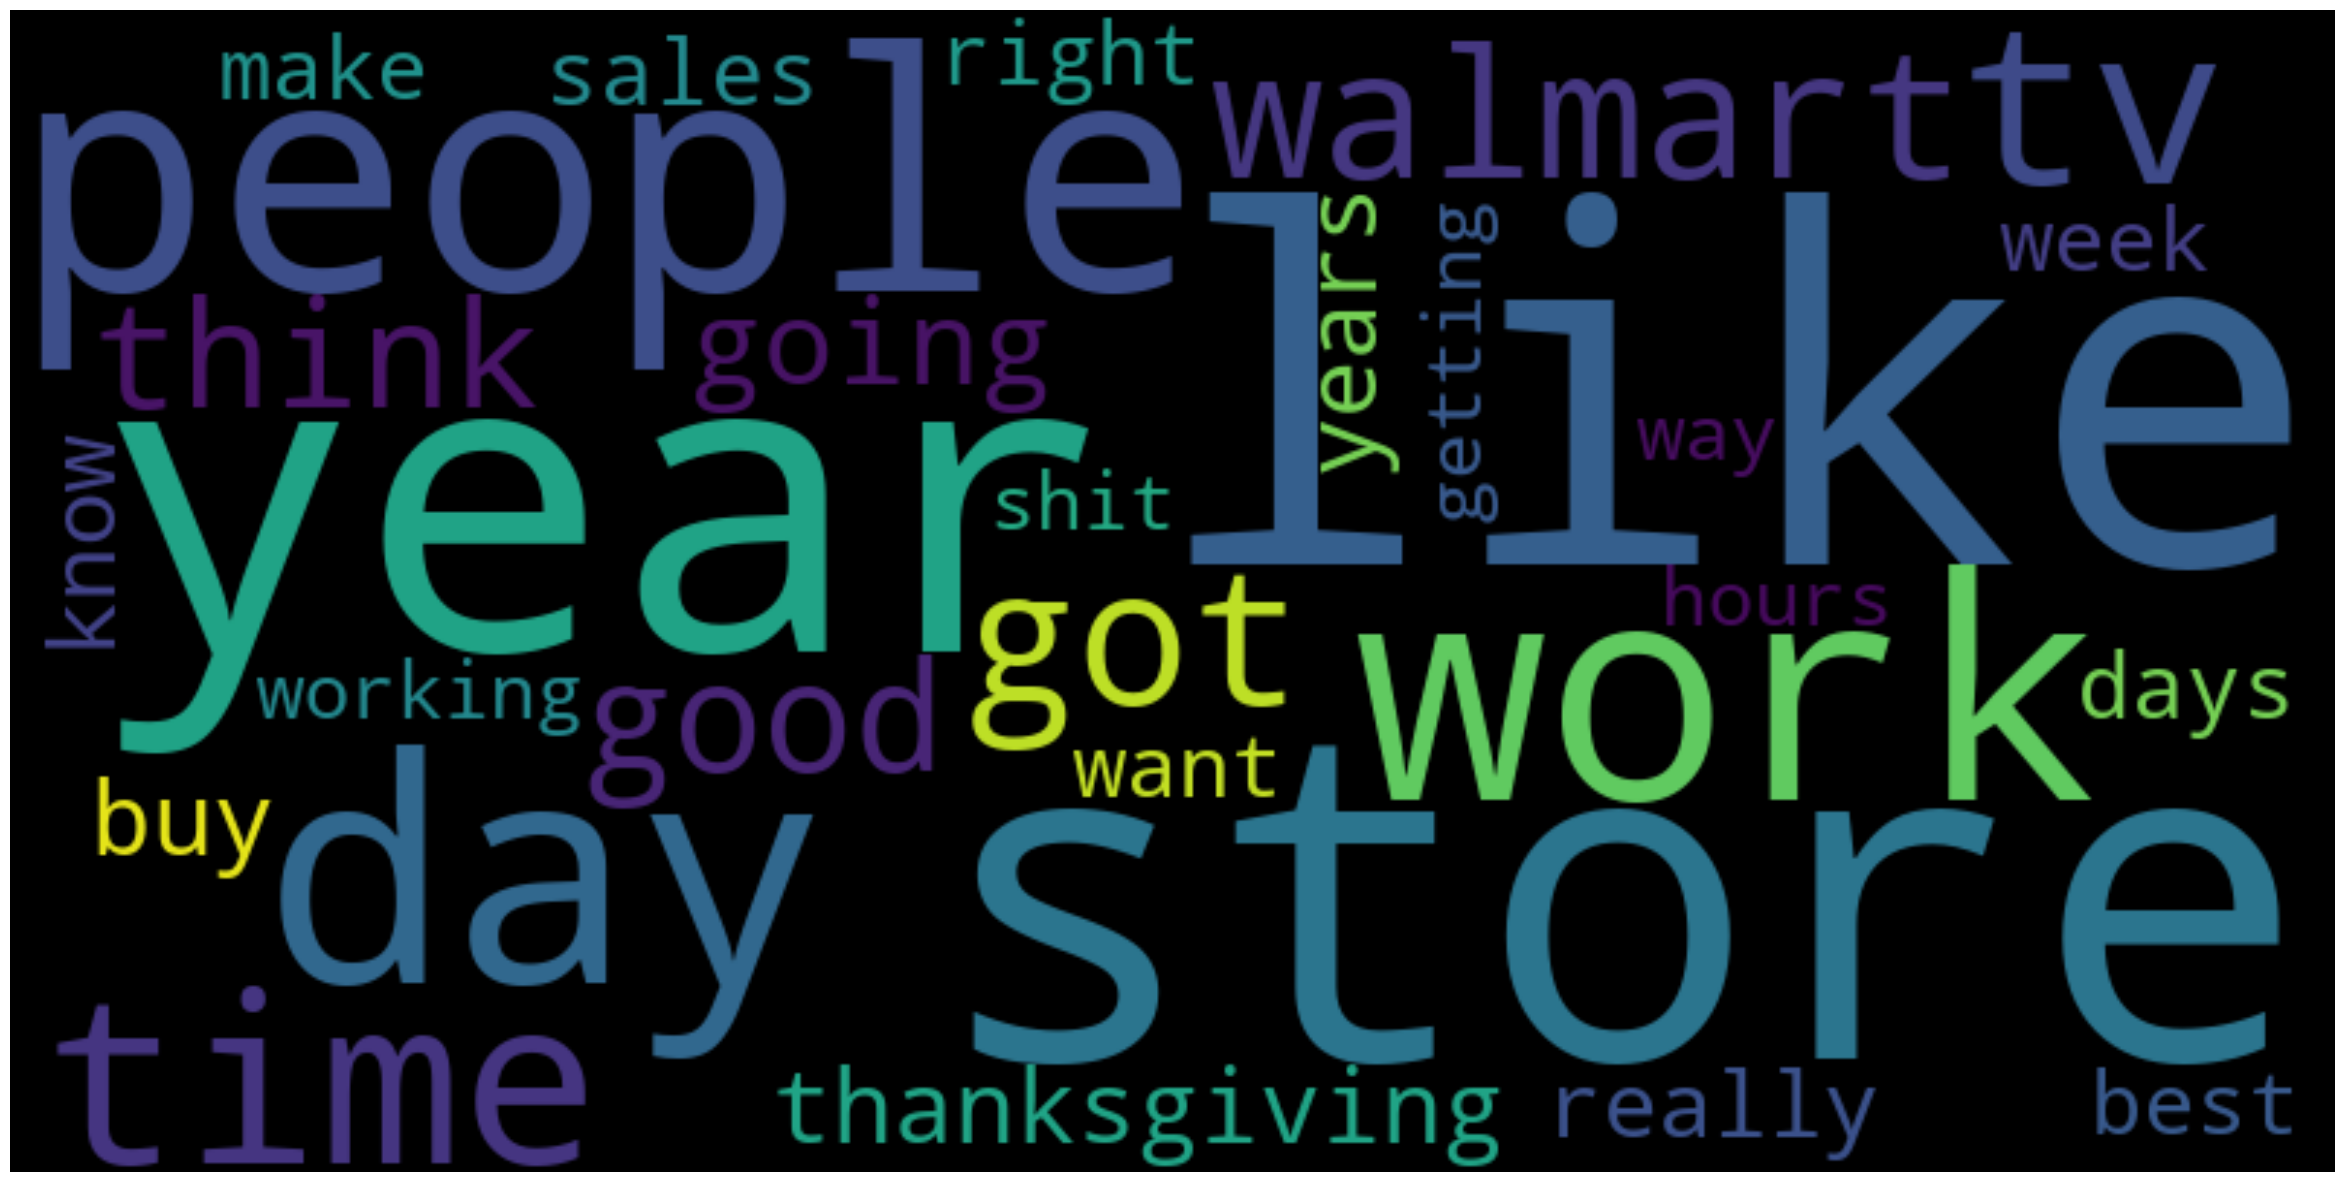

Topic #1:


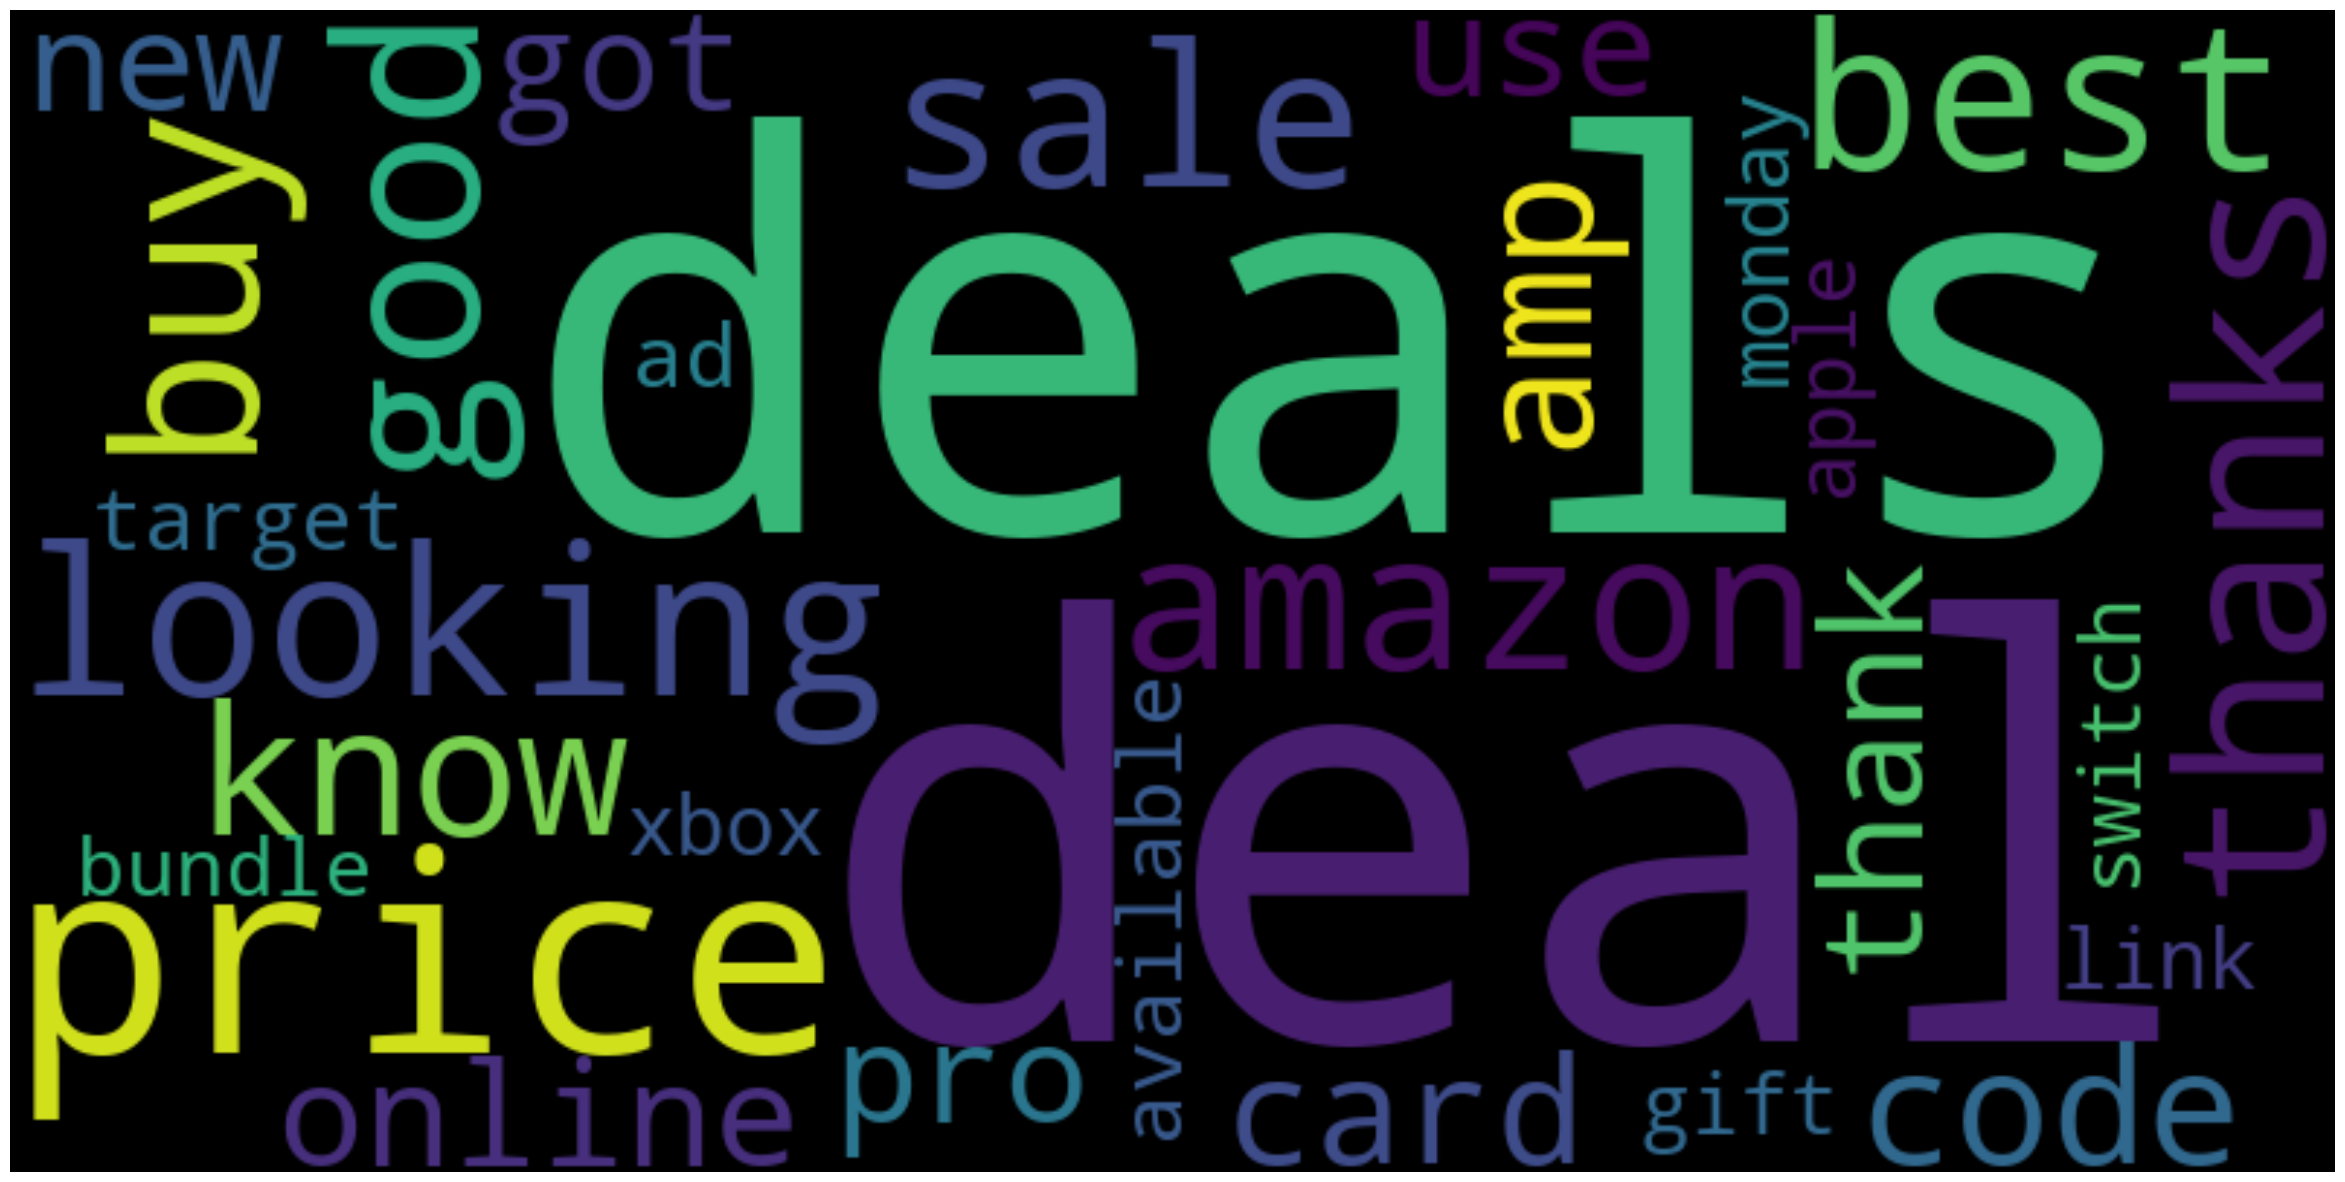

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `lda` is your trained LDA model and `vectorizer` is the CountVectorizer/TfidfVectorizer used
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    # Generate a word cloud for the top words in the topic
    words = {feature_names[i]: topic[i] for i in topic.argsort()[:-31:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color ='black').generate_from_frequencies(words)
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [24]:
df.to_csv('/Users/Abdul/Downloads/blackfriday_topics.csv', index=True)

## Tried the following methods before deciding to adopt the above method.

In [ ]:
mcl.head()

In [ ]:
mcl.shape

In [ ]:
 # Defining functions to drop columns that are not needed for the LDA model
def remove_vars(df):
    df.drop(['score', 'subreddit_id', 'var_year'], axis=1, inplace=True)
    return df
remove_vars(mcl)

In [ ]:
# Determing the optimal number of topics for the LDA model using the monograms count vectorized and lemmatized data
n_comps = [2, 3, 4]
for n in n_comps:
    lda = LatentDirichletAllocation(n_components=n, random_state=42)
    lda.fit(mcl)
    print(f'Model Perplexity for {n} topics:', lda.perplexity(mcl))
    print(f'Model Score for {n} topics:', lda.score(mcl))
    w = 15

    feature_names = mcl.columns
    for index, topic in enumerate(lda.components_):
        top_indices = topic.argsort()[-w:]  
        print(f'The top {w} words for topic #{index}')
        print([feature_names[i] for i in top_indices])

    topic_results = lda.transform(mcl)
    print(topic_results[0].round(2))


In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(mco)

# Building the LDA model using the monograms count vectorized data
feature_names_mco = mco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mco)
print(f'Model Perplexity:', lda.perplexity(mco))
print(f'Model Score:', lda.score(mco))
w = 15

feature_names = mco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mco[i] for i in top_indices])

topic_results_mco = lda.transform(mco)

print(topic_results_mco[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(bcl)

# Building the LDA model using the bigrams count vectorized and lemmatized data
feature_names_bcl = bcl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bcl)
print(f'Model Perplexity:', lda.perplexity(bcl))
print(f'Model Score:', lda.score(bcl))
w = 15

feature_names = bcl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mco[i] for i in top_indices])

topic_results_mco = lda.transform(bcl)

print(topic_results_mco[0].round(2))

In [ ]:
# removing the columns that are not needed for the LDA model
remove_vars(bco)

# Building the LDA model using the bigrams count vectorized data
feature_names_bco = bco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bco)
print(f'Model Perplexity:', lda.perplexity(bco))
print(f'Model Score:', lda.score(bco))
w = 15

feature_names = bco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bco[i] for i in top_indices])

topic_results_bco = lda.transform(bco)
print(topic_results_bco[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(tcl)

# Building the LDA model using the trigrams count vectorized and lemmatized data
feature_names_tcl = tcl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tcl)
print(f'Model Perplexity:', lda.perplexity(tcl))
print(f'Model Score:', lda.score(tcl))
w = 15

feature_names = tcl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tcl[i] for i in top_indices])

topic_results_tcl = lda.transform(tcl)

print(topic_results_tcl[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(tco)

# Building the LDA model using the trigrams count vectorized data
feature_names_tco = tco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tco)
print(f'Model Perplexity:', lda.perplexity(tco))
print(f'Model Score:', lda.score(tco))
w = 15

feature_names = tco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tco[i] for i in top_indices])

topic_results_tco = lda.transform(tco)

print(topic_results_tco[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model

remove_vars(ocl)

# Building the LDA model using the one to three grams count vectorized and lemmatized data
feature_names_ocl = ocl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(ocl)
print(f'Model Perplexity:', lda.perplexity(ocl))
print(f'Model Score:', lda.score(ocl))
w = 15

feature_names = ocl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_ocl[i] for i in top_indices])

topic_results_ocl = lda.transform(ocl)

print(topic_results_ocl[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(oco)

# Building the LDA model using the one to three grams count vectorized data
feature_names_oco = oco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(oco)
print(f'Model Perplexity:', lda.perplexity(oco))
print(f'Model Score:', lda.score(oco))
w = 15

feature_names = oco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_oco[i] for i in top_indices])

topic_results_oco = lda.transform(oco)

print(topic_results_oco[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(mctl)

# Building the LDA model using the monograms tf_idf vectorized and lemmatized data
feature_names_mctl = mctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mctl)
print(f'Model Perplexity:', lda.perplexity(mctl))
print(f'Model Score:', lda.score(mctl))
w = 15

feature_names = mctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mctl[i] for i in top_indices])

topic_results_mctl = lda.transform(mctl)

print(topic_results_mctl[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
removed_columns = mcto[['score', 'subreddit_id', 'var_year']].copy()
remove_vars(mcto)

# Building the LDA model using the monograms tf_idf vectorized data
feature_names_mcto = mcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mcto)
print(f'Model Perplexity:', lda.perplexity(mcto))
print(f'Model Score:', lda.score(mcto))
w = 15

feature_names = mcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mcto[i] for i in top_indices])

topic_results_mcto = lda.transform(mcto)

print(topic_results_mcto[0].round(2))

for topic_idx in range(lda.n_components):
    mcto[f'Topic_{topic_idx}_Prob'] = topic_results_mcto[:, topic_idx]

# Print the first few rows to verify the new columns
print(mcto.head())
# Rejoin the removed columns to the main DataFrame
mcto = mcto.merge(removed_columns, left_index=True, right_index=True, how='left')
mcto.to_csv('mcto_with_topic_probabilities.csv', index=True)


In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(bctl)
bctl.dropna(inplace=True)

# Building the LDA model using the bigrams tf_idf vectorized and lemmatized data
feature_names_bctl = bctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bctl)
print(f'Model Perplexity:', lda.perplexity(bctl))
print(f'Model Score:', lda.score(bctl))
w = 15

feature_names = bctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bctl[i] for i in top_indices])

topic_results_bctl = lda.transform(bctl)

print(topic_results_bctl[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(bcto)
bcto.dropna(inplace=True)

# Building the LDA model using the bigrams tf_idf vectorized data
feature_names_bcto = bcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bcto)
print(f'Model Perplexity:', lda.perplexity(bcto))
print(f'Model Score:', lda.score(bcto))
w = 15

feature_names = bcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bcto[i] for i in top_indices])

topic_results_bcto = lda.transform(bcto)

print(topic_results_bcto[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(octl)
octl.dropna(inplace=True)

# Building the LDA model using the one to three grams tf_idf vectorized and lemmatized data
feature_names_octl = octl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(octl)
print(f'Model Perplexity:', lda.perplexity(octl))
print(f'Model Score:', lda.score(octl))
w = 15

feature_names = octl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_octl[i] for i in top_indices])

topic_results_octl = lda.transform(octl)

print(topic_results_octl[0].round(2))

In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(octo)
octo.dropna(inplace=True)

# Building the LDA model using the one to three grams tf_idf vectorized data
feature_names_octo = octo.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(octo)
print(f'Model Perplexity:', lda.perplexity(octo))
print(f'Model Score:', lda.score(octo))
w = 15

feature_names = octo.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_octo[i] for i in top_indices])

topic_results_octo = lda.transform(octo)

print(topic_results_octo[0].round(2))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `lda` is your trained LDA model and `vectorizer` is the CountVectorizer/TfidfVectorizer used
feature_names = octo.columns
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    # Generate a word cloud for the top words in the topic
    words = {feature_names[i]: topic[i] for i in topic.argsort()[:-11:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words)
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
# Removing the columns that are not needed for the LDA model
remove_vars(tctl)
tctl.dropna(inplace=True)

# Building the LDA model using the trigrams tf_idf vectorized and lemmatized data
feature_names_tctl = tctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tctl)
print(f'Model Perplexity:', lda.perplexity(tctl))
print(f'Model Score:', lda.score(tctl))
w = 15

feature_names = tctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tctl[i] for i in top_indices])

topic_results_tctl = lda.transform(tctl)

print(topic_results_tctl[0].round(2))

In [ ]:
removed_columns = tcto[['score', 'subreddit_id', 'var_year']].copy()

# Removing the columns that are not needed for the LDA model
remove_vars(tcto)

# Building the LDA model using the trigrams tf_idf vectorized data
feature_names_tcto = tcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tcto)
print(f'Model Perplexity:', lda.perplexity(tcto))
print(f'Model Score:', lda.score(tcto))
w = 15

feature_names = tcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tcto[i] for i in top_indices])

topic_results_tcto = lda.transform(tcto)

print(topic_results_tcto[0].round(2))

for topic_idx in range(lda.n_components):
    tcto[f'Topic_{topic_idx}_Prob'] = topic_results_tcto[:, topic_idx]

# Print the first few rows to verify the new columns
print(tcto.head())
tcto = tcto.merge(removed_columns, left_index=True, right_index=True, how='left')

tcto.to_csv('tcto_with_topic_probabilities.csv', index=True)